In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as cl
from matplotlib.colorbar import Colorbar
import seaborn as sns
import pandas as pd
import numpy as np
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
tess_list = glob.glob('./targetdata/*_tess.csv')

tess_data = []

for filename in tess_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    tess_data.append(df)
    
tess_data = pd.concat(tess_data, axis=0, ignore_index=True)

In [3]:
kic = tess_data['KIC']
p_r = tess_data['Santos Period (d)']

ls_a = tess_data['LS Period 1st peak (d)']
ls_b = tess_data['LS Period 2nd peak (d)']
ls_c = tess_data['LS Period 3rd peak (d)']
ls_amp_a = tess_data['LS Period 1st amplitude']
ls_amp_b = tess_data['LS Period 2nd amplitude']
ls_amp_c = tess_data['LS Period 3rd amplitude']
ls_rms_a = tess_data['LS Period 1st RMS']
ls_rms_b = tess_data['LS Period 2nd RMS']
ls_rms_c = tess_data['LS Period 3rd RMS']
ls_mad_a = tess_data['LS Period 1st MAD']
ls_mad_b = tess_data['LS Period 2nd MAD']
ls_mad_c = tess_data['LS Period 3rd MAD']
ls2_a = tess_data['LS 2-term Period 1st peak (d)']
ls2_b = tess_data['LS 2-term Period 2nd peak (d)']
ls2_c = tess_data['LS 2-term Period 3rd peak (d)']
ls2_amp_a = tess_data['LS 2-term Period 1st amplitude']
ls2_amp_b = tess_data['LS 2-term Period 2nd amplitude']
ls2_amp_c = tess_data['LS 2-term Period 3rd amplitude']
ls2_rms_a = tess_data['LS 2-term Period 1st RMS']
ls2_rms_b = tess_data['LS 2-term Period 2nd RMS']
ls2_rms_c = tess_data['LS 2-term Period 3rd RMS']
ls2_mad_a = tess_data['LS 2-term Period 1st MAD']
ls2_mad_b = tess_data['LS 2-term Period 2nd MAD']
ls2_mad_c = tess_data['LS 2-term Period 3rd MAD']
acf_a = tess_data['ACF Period 1st peak (d)']
acf_b = tess_data['ACF Period 2nd peak (d)']
acf_c = tess_data['ACF Period 3rd peak (d)']
acf_amp_a = tess_data['ACF Period 1st amplitude']
acf_amp_b = tess_data['ACF Period 2nd amplitude']
acf_amp_c = tess_data['ACF Period 3rd amplitude']
acf_rms_a = tess_data['ACF Period 1st RMS']
acf_rms_b = tess_data['ACF Period 2nd RMS']
acf_rms_c = tess_data['ACF Period 3rd RMS']
acf_mad_a = tess_data['ACF Period 1st MAD']
acf_mad_b = tess_data['ACF Period 2nd MAD']
acf_mad_c = tess_data['ACF Period 3rd MAD']
ls_med = tess_data['LS median power']
ls2_med = tess_data['LS 2-term median power']
rvar = tess_data['Rvar']
cdpp = tess_data['CDPP']

In [4]:
ts1 = pd.read_csv('S21r_train.csv')
ts2 = pd.read_csv('S21n_train.csv')
training_set = pd.concat([ts1, ts2])
kic_match = training_set['KIC']
kp_match = training_set['Kp']
teff_match = training_set['Teff']
binary_match = training_set['Flag_Binary']
koi_match = training_set['Flag_KOI']
# sph_match = training_set['Sph']

# kic_t_train = kic_match[:np.where(kic_match==max(kic_t))[0][0]+1].reindex(kic_t).index.values
# kp_t = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t.values]
# teff_t = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t.values]
# flag_binary_t = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t.values]
# flag_koi_t = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

# Vetting for rotation

In [5]:
period_state = [1 if p > 0 else 0 for p in p_r]

In [6]:
features = np.array([ls_a, ls_b, ls_c,
                    ls_amp_a, ls_amp_b, ls_amp_c,
                    ls_rms_a, ls_rms_b, ls_rms_c,
                    ls_mad_a, ls_mad_b, ls_mad_c,
                    ls2_a, ls2_b, ls2_c,
                    ls2_amp_a, ls2_amp_b, ls2_amp_c,
                    ls2_rms_a, ls2_rms_b, ls2_rms_c,
                    ls2_mad_a, ls2_mad_b, ls2_mad_c,
                    acf_a, acf_b, acf_c,
                    acf_amp_a, acf_amp_b, acf_amp_c,
                    acf_rms_a, acf_rms_b, acf_rms_c,
                    acf_mad_a, acf_mad_b, acf_mad_c,
#                     ls_med, rvar, cdpp])#,
                    ls_med, ls2_med, rvar, cdpp])#,
                    #kp_t, teff_t])#, flag_binary_t, flag_koi_t])
feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                 'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                 'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                 'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                 'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                 'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                 'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                 'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                 'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                 'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                 'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                 'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                  'LS median power', 'Rvar', 'CDPP']#,
                 'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [7]:
features[np.isnan(features)] = 0

In [8]:
forest = RandomForestClassifier(random_state=0)
forest.fit(features.T, period_state)

# classifier = svm.LinearSVC()
# classifier.fit(features.T, period_state)

RandomForestClassifier(random_state=0)

In [9]:
# classifier.get_params()

In [10]:
importances = forest.feature_importances_
# importances = np.abs(classifier.coef_[0])

In [11]:
for i, val in enumerate(importances):
    print(f'{feature_names[i]}: {val:.5f}')

LS Period 1st peak (d): 0.01746
LS Period 2nd peak (d): 0.01827
LS Period 3rd peak (d): 0.02760
LS Period 1st amplitude: 0.06895
LS Period 2nd amplitude: 0.03857
LS Period 3rd amplitude: 0.02895
LS Period 1st RMS: 0.01333
LS Period 2nd RMS: 0.01626
LS Period 3rd RMS: 0.00898
LS Period 1st MAD: 0.01606
LS Period 2nd MAD: 0.00932
LS Period 3rd MAD: 0.00894
LS 2-term Period 1st peak (d): 0.01565
LS 2-term Period 2nd peak (d): 0.02050
LS 2-term Period 3rd peak (d): 0.02351
LS 2-term Period 1st amplitude: 0.06947
LS 2-term Period 2nd amplitude: 0.06275
LS 2-term Period 3rd amplitude: 0.02249
LS 2-term Period 1st RMS: 0.01973
LS 2-term Period 2nd RMS: 0.01217
LS 2-term Period 3rd RMS: 0.00914
LS 2-term Period 1st MAD: 0.01560
LS 2-term Period 2nd MAD: 0.00978
LS 2-term Period 3rd MAD: 0.00903
ACF Period 1st peak (d): 0.01299
ACF Period 2nd peak (d): 0.00789
ACF Period 3rd peak (d): 0.00285
ACF Period 1st amplitude: 0.06377
ACF Period 2nd amplitude: 0.00986
ACF Period 3rd amplitude: 0.00352
A

## Testing

In [12]:
test_list = glob.glob('./testsetdata/*_tess.csv')

test_data = []

for filename in test_list:
    df = pd.read_csv(filename, index_col=None, header=0)
    test_data.append(df)
    
test_data = pd.concat(test_data, axis=0, ignore_index=True)

In [13]:
kic_test = test_data['KIC']
p_r_test = test_data['Santos Period (d)']

ls_a_test = test_data['LS Period 1st peak (d)']
ls_b_test = test_data['LS Period 2nd peak (d)']
ls_c_test = test_data['LS Period 3rd peak (d)']
ls_amp_a_test = test_data['LS Period 1st amplitude']
ls_amp_b_test = test_data['LS Period 2nd amplitude']
ls_amp_c_test = test_data['LS Period 3rd amplitude']
ls_rms_a_test = test_data['LS Period 1st RMS']
ls_rms_b_test = test_data['LS Period 2nd RMS']
ls_rms_c_test = test_data['LS Period 3rd RMS']
ls_mad_a_test = test_data['LS Period 1st MAD']
ls_mad_b_test = test_data['LS Period 2nd MAD']
ls_mad_c_test = test_data['LS Period 3rd MAD']
ls2_a_test = test_data['LS 2-term Period 1st peak (d)']
ls2_b_test = test_data['LS 2-term Period 2nd peak (d)']
ls2_c_test = test_data['LS 2-term Period 3rd peak (d)']
ls2_amp_a_test = test_data['LS 2-term Period 1st amplitude']
ls2_amp_b_test = test_data['LS 2-term Period 2nd amplitude']
ls2_amp_c_test = test_data['LS 2-term Period 3rd amplitude']
ls2_rms_a_test = test_data['LS 2-term Period 1st RMS']
ls2_rms_b_test = test_data['LS 2-term Period 2nd RMS']
ls2_rms_c_test = test_data['LS 2-term Period 3rd RMS']
ls2_mad_a_test = test_data['LS 2-term Period 1st MAD']
ls2_mad_b_test = test_data['LS 2-term Period 2nd MAD']
ls2_mad_c_test = test_data['LS 2-term Period 3rd MAD']
acf_a_test = test_data['ACF Period 1st peak (d)']
acf_b_test = test_data['ACF Period 2nd peak (d)']
acf_c_test = test_data['ACF Period 3rd peak (d)']
acf_amp_a_test = test_data['ACF Period 1st amplitude']
acf_amp_b_test = test_data['ACF Period 2nd amplitude']
acf_amp_c_test = test_data['ACF Period 3rd amplitude']
acf_rms_a_test = test_data['ACF Period 1st RMS']
acf_rms_b_test = test_data['ACF Period 2nd RMS']
acf_rms_c_test = test_data['ACF Period 3rd RMS']
acf_mad_a_test = test_data['ACF Period 1st MAD']
acf_mad_b_test = test_data['ACF Period 2nd MAD']
acf_mad_c_test = test_data['ACF Period 3rd MAD']
ls_med_test = test_data['LS median power']
ls2_med_test = test_data['LS 2-term median power']
rvar_test = test_data['Rvar']
cdpp_test = test_data['CDPP']

In [14]:
tst1 = pd.read_csv('S21r_test.csv')
tst2 = pd.read_csv('S21n_test.csv')
testing_set2 = pd.concat([tst1, tst2])
testing_set2 = testing_set2[~testing_set2.index.duplicated()]
kic_match2 = testing_set2['KIC']
kp_match2 = testing_set2['Kp']
teff_match2 = testing_set2['Teff']
binary_match2 = testing_set2['Flag_Binary']
koi_match2 = testing_set2['Flag_KOI']
# sph_match = training_set['Sph']

In [15]:
# kic_t_temp = kic_match2[:np.where(kic_match2==max(kic_t_test))[0][0]+1].reindex(kic_t_test).index.values
# kp_t_test = [m for (k, m) in zip(kic_match, kp_match) if k in kic_t_test.values]
# teff_t_test = [t for (k, t) in zip(kic_match, teff_match) if k in kic_t_test.values]
# flag_binary_t_test = [f for (k, f) in zip(kic_match, binary_match) if k in kic_t_test.values]
# flag_koi_t_test = [f for (k, f) in zip(kic_match, koi_match) if k in kic_t_test.values]
# sph_t = [s for (k, s) in zip(kic_match, sph_match) if k in kic_t.values]

In [16]:
test_features = np.array([ls_a_test, ls_b_test, ls_c_test,
                    ls_amp_a_test, ls_amp_b_test, ls_amp_c_test,
                    ls_rms_a_test, ls_rms_b_test, ls_rms_c_test,
                    ls_mad_a_test, ls_mad_b_test, ls_mad_c_test,
                    ls2_a_test, ls2_b_test, ls2_c_test,
                    ls2_amp_a_test, ls2_amp_b_test, ls2_amp_c_test,
                    ls2_rms_a_test, ls2_rms_b_test, ls2_rms_c_test,
                    ls2_mad_a_test, ls2_mad_b_test, ls2_mad_c_test,
                    acf_a_test, acf_b_test, acf_c_test,
                    acf_amp_a_test, acf_amp_b_test, acf_amp_c_test,
                    acf_rms_a_test, acf_rms_b_test, acf_rms_c_test,
                    acf_mad_a_test, acf_mad_b_test, acf_mad_c_test,
#                     ls_med_test, rvar_test, cdpp_test])#,
                    ls_med_test, ls2_med_test, rvar_test, cdpp_test])#,
#                     kp_t_test, teff_t_test])#, flag_binary_t_test, flag_koi_t_test])
test_feature_names = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                     'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                     'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                     'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                     'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                     'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                     'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                     'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                     'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                     'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                     'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                     'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                      'LS median power', 'Rvar', 'CDPP']#,
                     'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [17]:
test_features[np.isnan(test_features)] = 0

In [18]:
predictions = forest.predict(test_features.T)
# predictions = classifier.predict(test_features.T)

In [19]:
period_state_test = [1 if p > 0 else 0 for p in p_r_test]

In [20]:
yy = 0
yn = 0
ny = 0
nn = 0
for p, g in zip(period_state_test, predictions):
    if p == 1 and g == 1:
        yy += 1
    elif p == 1 and g == 0:
        yn += 1
    elif p == 0 and g == 1:
        ny += 1
    elif p == 0 and g == 0:
        nn += 1

In [21]:
print('*** TESSIFY ***')
print('in the testing set:')
print(f'- {(yy+yn)/len(predictions)*100:.2f}% are rotators')
print(f'- {(nn+ny)/len(predictions)*100:.2f}% are non-rotators')
print('RF predicts that:')
print(f'- {(yy+ny)/len(predictions)*100:.2f}% are rotators')
print(f'- {(nn+yn)/len(predictions)*100:.2f}% are non-rotators')
print('for rotators in test set, RF predicts:')
print(f'- {yy/(yy+yn)*100:.2f}% are rotators')
print(f'- {yn/(yy+yn)*100:.2f}% are non-rotators')
print('for non-rotators in test set, RF predicts:')
print(f'- {ny/(ny+nn)*100:.2f}% are rotators')
print(f'- {nn/(ny+nn)*100:.2f}% are non-rotators')

*** TESSIFY ***
in the testing set:
- 34.15% are rotators
- 65.85% are non-rotators
RF predicts that:
- 34.09% are rotators
- 65.91% are non-rotators
for rotators in test set, RF predicts:
- 81.14% are rotators
- 18.86% are non-rotators
for non-rotators in test set, RF predicts:
- 9.69% are rotators
- 90.31% are non-rotators


In [22]:
yyc = 0
ync = 0
for p, g, gtp in zip(period_state_test, predictions, p_r_test):
    if gtp < 27:
        if p == 1 and g == 1:
            yyc += 1
        elif p == 1 and g == 0:
            ync += 1

In [23]:
print('for periods less than a sector in test set, RF predicts:')
print(f'- {yyc/(yyc+ync)*100:.2f}% are rotators')
print(f'- {ync/(yyc+ync)*100:.2f}% are non-rotators')

for periods less than a sector in test set, RF predicts:
- 83.08% are rotators
- 16.92% are non-rotators


In [24]:
testbins = np.arange(5,145,5)
percentage_correct = np.zeros(len(testbins))

for i, b in enumerate(testbins):
    
    b1 = b-5
    b2 = b
    count = 0
    count_yes = 0
    
    for p, g, gtp in zip(period_state_test, predictions, p_r_test):
        if gtp > b1 and gtp <= b2:
            count += 1
            if g == 1:
                count_yes += 1
    
    if count > 0:
        percentage_correct[i] = count_yes/count

In [25]:
percentage_correct

array([0.84030418, 0.85970149, 0.88118812, 0.84642857, 0.76878613,
       0.73538961, 0.75      , 0.70588235, 0.74390244, 0.76086957,
       0.66666667, 0.71428571, 0.8       , 1.        , 1.        ,
       0.75      , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.5       , 0.        , 0.5       , 0.        ,
       0.        , 0.        , 1.        ])

In [26]:
testbins = np.arange(5,145,5)
num_correct = np.zeros(len(testbins))
num_total = np.zeros(len(testbins))

for i, b in enumerate(testbins):
    
    b1 = b-5
    b2 = b
    count = 0
    count_yes = 0
    
    for p, g, gtp in zip(period_state_test, predictions, p_r_test):
        if gtp > b1 and gtp <= b2:
            count += 1
            num_total += 1
            if g == 1:
                count_yes += 1
    
    if count > 0:
        num_correct[i] = count_yes
    num_total[i] = count

In [27]:
num_correct, num_total

(array([442., 576., 712., 711., 665., 453., 246., 108.,  61.,  35.,  14.,
          5.,   4.,   2.,   1.,   3.,   0.,   3.,   1.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([4.985e+03, 4.459e+03, 3.789e+03, 2.981e+03, 2.141e+03, 1.276e+03,
        6.600e+02, 3.320e+02, 1.790e+02, 9.700e+01, 5.100e+01, 3.000e+01,
        2.300e+01, 1.800e+01, 1.600e+01, 1.500e+01, 1.100e+01, 1.000e+01,
        7.000e+00, 6.000e+00, 5.000e+00, 5.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]))

# Vetting for period goodness

In [28]:
features_g = np.array([ls_a[p_r>0], ls_b[p_r>0], ls_c[p_r>0],
                    ls_amp_a[p_r>0], ls_amp_b[p_r>0], ls_amp_c[p_r>0],
                    ls_rms_a[p_r>0], ls_rms_b[p_r>0], ls_rms_c[p_r>0],
                    ls_mad_a[p_r>0], ls_mad_b[p_r>0], ls_mad_c[p_r>0],
                    ls2_a[p_r>0], ls2_b[p_r>0], ls2_c[p_r>0],
                    ls2_amp_a[p_r>0], ls2_amp_b[p_r>0], ls2_amp_c[p_r>0],
                    ls2_rms_a[p_r>0], ls2_rms_b[p_r>0], ls2_rms_c[p_r>0],
                    ls2_mad_a[p_r>0], ls2_mad_b[p_r>0], ls2_mad_c[p_r>0],
                    acf_a[p_r>0], acf_b[p_r>0], acf_c[p_r>0],
                    acf_amp_a[p_r>0], acf_amp_b[p_r>0], acf_amp_c[p_r>0],
                    acf_rms_a[p_r>0], acf_rms_b[p_r>0], acf_rms_c[p_r>0],
                    acf_mad_a[p_r>0], acf_mad_b[p_r>0], acf_mad_c[p_r>0],
#                     ls_med[p_r>0], rvar[p_r>0], cdpp[p_r>0]])#,
                    ls_med[p_r>0], ls2_med[p_r>0], rvar[p_r>0], cdpp[p_r>0]])#,
                    #kp_t, teff_t])#, flag_binary_t, flag_koi_t])
feature_names_g = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                     'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                     'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                     'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                     'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                     'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                     'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                     'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                     'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                     'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                     'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                     'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                      'LS median power', 'Rvar', 'CDPP']#,
                     'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [29]:
tol = 0.1
period_goodness = [1 if l > p-p*tol and l < p+p*tol else 0 for p, l in zip(p_r[p_r>0], ls2_a[p_r>0])]

In [30]:
features_g[np.isnan(features_g)] = 0

In [31]:
forest_g = RandomForestClassifier(random_state=0)
forest_g.fit(features_g.T, period_goodness)

RandomForestClassifier(random_state=0)

In [32]:
importances_g = forest_g.feature_importances_

In [33]:
for i, val in enumerate(importances_g):
    print(f'{feature_names_g[i]}: {val:.5f}')

LS Period 1st peak (d): 0.03527
LS Period 2nd peak (d): 0.02354
LS Period 3rd peak (d): 0.02000
LS Period 1st amplitude: 0.02884
LS Period 2nd amplitude: 0.02418
LS Period 3rd amplitude: 0.02159
LS Period 1st RMS: 0.02489
LS Period 2nd RMS: 0.01621
LS Period 3rd RMS: 0.01340
LS Period 1st MAD: 0.04298
LS Period 2nd MAD: 0.01941
LS Period 3rd MAD: 0.01563
LS 2-term Period 1st peak (d): 0.06980
LS 2-term Period 2nd peak (d): 0.02849
LS 2-term Period 3rd peak (d): 0.02173
LS 2-term Period 1st amplitude: 0.07149
LS 2-term Period 2nd amplitude: 0.04359
LS 2-term Period 3rd amplitude: 0.02551
LS 2-term Period 1st RMS: 0.02340
LS 2-term Period 2nd RMS: 0.01603
LS 2-term Period 3rd RMS: 0.02344
LS 2-term Period 1st MAD: 0.03481
LS 2-term Period 2nd MAD: 0.01783
LS 2-term Period 3rd MAD: 0.01418
ACF Period 1st peak (d): 0.02224
ACF Period 2nd peak (d): 0.01340
ACF Period 3rd peak (d): 0.00356
ACF Period 1st amplitude: 0.02303
ACF Period 2nd amplitude: 0.01569
ACF Period 3rd amplitude: 0.00433
A

## Testing

In [34]:
test_features_g = np.array([ls_a_test, ls_b_test, ls_c_test,
                    ls_amp_a_test, ls_amp_b_test, ls_amp_c_test,
                    ls_rms_a_test, ls_rms_b_test, ls_rms_c_test,
                    ls_mad_a_test, ls_mad_b_test, ls_mad_c_test,
                    ls2_a_test, ls2_b_test, ls2_c_test,
                    ls2_amp_a_test, ls2_amp_b_test, ls2_amp_c_test,
                    ls2_rms_a_test, ls2_rms_b_test, ls2_rms_c_test,
                    ls2_mad_a_test, ls2_mad_b_test, ls2_mad_c_test,
                    acf_a_test, acf_b_test, acf_c_test,
                    acf_amp_a_test, acf_amp_b_test, acf_amp_c_test,
                    acf_rms_a_test, acf_rms_b_test, acf_rms_c_test,
                    acf_mad_a_test, acf_mad_b_test, acf_mad_c_test,
#                     ls_med_test, rvar_test, cdpp_test])#,
                    ls_med_test, ls2_med_test, rvar_test, cdpp_test])#,
#                     kp_t_test, teff_t_test])#, flag_binary_t_test, flag_koi_t_test])
test_feature_names_g = ['LS Period 1st peak (d)', 'LS Period 2nd peak (d)', 'LS Period 3rd peak (d)',
                     'LS Period 1st amplitude', 'LS Period 2nd amplitude', 'LS Period 3rd amplitude',
                     'LS Period 1st RMS', 'LS Period 2nd RMS', 'LS Period 3rd RMS',
                     'LS Period 1st MAD', 'LS Period 2nd MAD', 'LS Period 3rd MAD',
                     'LS 2-term Period 1st peak (d)', 'LS 2-term Period 2nd peak (d)', 'LS 2-term Period 3rd peak (d)',
                     'LS 2-term Period 1st amplitude', 'LS 2-term Period 2nd amplitude', 'LS 2-term Period 3rd amplitude',
                     'LS 2-term Period 1st RMS', 'LS 2-term Period 2nd RMS', 'LS 2-term Period 3rd RMS',
                     'LS 2-term Period 1st MAD', 'LS 2-term Period 2nd MAD', 'LS 2-term Period 3rd MAD',
                     'ACF Period 1st peak (d)', 'ACF Period 2nd peak (d)', 'ACF Period 3rd peak (d)',
                     'ACF Period 1st amplitude', 'ACF Period 2nd amplitude', 'ACF Period 3rd amplitude',
                     'ACF Period 1st RMS', 'ACF Period 2nd RMS', 'ACF Period 3rd RMS',
                     'ACF Period 1st MAD', 'ACF Period 2nd MAD', 'ACF Period 3rd MAD',
#                      'LS median power', 'Rvar', 'CDPP']#,
                     'LS median power', 'LS 2-term median power', 'Rvar', 'CDPP']#,
#                  'Kp', 'Teff']#, 'Binary flag', 'KOI flag']

In [35]:
test_features_g[np.isnan(test_features_g)] = 0

In [36]:
predictions_g = forest_g.predict(test_features_g.T)

In [37]:
tol = 0.1
period_goodness_test = [1 if l > p-p*tol and l < p+p*tol else 0 for p, l in zip(p_r_test, ls2_a_test)]

In [38]:
yes_good = 0
yes_bad = 0
no_good = 0
no_bad = 0

for good, gtp in zip(predictions_g, p_r_test):
    if gtp > 0 and good == 1:
        yes_good += 1
    elif gtp > 0 and good == 0:
        yes_bad += 1
    elif gtp == 0 and good == 1:
        no_good += 1
    elif gtp == 0 and good == 0:
        no_bad += 1

In [39]:
print(f'{yes_good/(yes_good+yes_bad)*100:.2f}% of rotators are good')
print(f'{no_good/(no_good+no_bad)*100:.2f}% of nonrotators are good')

39.16% of rotators are good
4.93% of nonrotators are good


In [40]:
yy = 0
yn = 0
ny = 0
nn = 0
for p, g in zip(period_goodness_test, predictions_g):
    if p == 1 and g == 1:
        yy += 1
    elif p == 1 and g == 0:
        yn += 1
    elif p == 0 and g == 1:
        ny += 1
    elif p == 0 and g == 0:
        nn += 1

In [41]:
print('*** TESSIFY ***')
print('in the testing set:')
print(f'- {(yy+yn)/len(predictions_g)*100:.2f}% have good periods')
print(f'- {(nn+ny)/len(predictions_g)*100:.2f}% have periods outside 10%')
print('RF predicts that:')
print(f'- {(yy+ny)/len(predictions_g)*100:.2f}% have good periods')
print(f'- {(nn+yn)/len(predictions_g)*100:.2f}% have bad periods')
print('for good periods in test set, RF predicts:')
print(f'- {yy/(yy+yn)*100:.2f}% have good periods')
print(f'- {yn/(yy+yn)*100:.2f}% have bad periods')
print('for bad periods in test set, RF predicts:')
print(f'- {ny/(ny+nn)*100:.2f}% have good periods')
print(f'- {nn/(ny+nn)*100:.2f}% have bad periods')

*** TESSIFY ***
in the testing set:
- 14.28% have good periods
- 85.72% have periods outside 10%
RF predicts that:
- 16.62% have good periods
- 83.38% have bad periods
for good periods in test set, RF predicts:
- 89.02% have good periods
- 10.98% have bad periods
for bad periods in test set, RF predicts:
- 4.56% have good periods
- 95.44% have bad periods


In [42]:
testbins = np.arange(5,145,5)
percentage_correct_g = np.zeros(len(testbins))

for i, b in enumerate(testbins):
    
    b1 = b-5
    b2 = b
    count = 0
    count_yes = 0
    
    for p, g, gtp in zip(period_goodness_test, predictions_g, p_r_test):
        if gtp > b1 and gtp <= b2:
            count += 1
            if g == 1:
                count_yes += 1
    
    if count > 0:
        percentage_correct_g[i] = count_yes/count

In [43]:
percentage_correct_g

array([0.6026616 , 0.57014925, 0.58044554, 0.50595238, 0.33294798,
       0.1038961 , 0.01829268, 0.00653595, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [44]:
testbins = np.arange(5,145,5)
num_correct_g = np.zeros(len(testbins))
num_total_g = np.zeros(len(testbins))

for i, b in enumerate(testbins):
    
    b1 = b-5
    b2 = b
    count = 0
    count_yes = 0
    
    for p, g, gtp in zip(period_goodness_test, predictions_g, p_r_test):
        if gtp > b1 and gtp <= b2:
            count += 1
            num_total += 1
            if g == 1:
                count_yes += 1
    
    if count > 0:
        num_correct_g[i] = count_yes
    num_total_g[i] = count

In [45]:
num_correct_g, num_total_g

(array([317., 382., 469., 425., 288.,  64.,   6.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([526., 670., 808., 840., 865., 616., 328., 153.,  82.,  46.,  21.,
          7.,   5.,   2.,   1.,   4.,   1.,   3.,   1.,   1.,   0.,   2.,
          0.,   2.,   0.,   0.,   0.,   1.]))

In [78]:
yyc = 0
ync = 0
for p, g, gtp in zip(period_goodness_test, predictions_g, p_r_test):
    if gtp < 27:
        if p == 1 and g == 1:
            yyc += 1
        elif p == 1 and g == 0:
            ync += 1

In [79]:
print('for periods less than a sector in test set, RF predicts:')
print(f'- {yyc/(yyc+ync)*100:.2f}% are good')
print(f'- {ync/(yyc+ync)*100:.2f}% are bad')

for periods less than a sector in test set, RF predicts:
- 89.14% are good
- 10.86% are bad


## Some plots

<IPython.core.display.Javascript object>


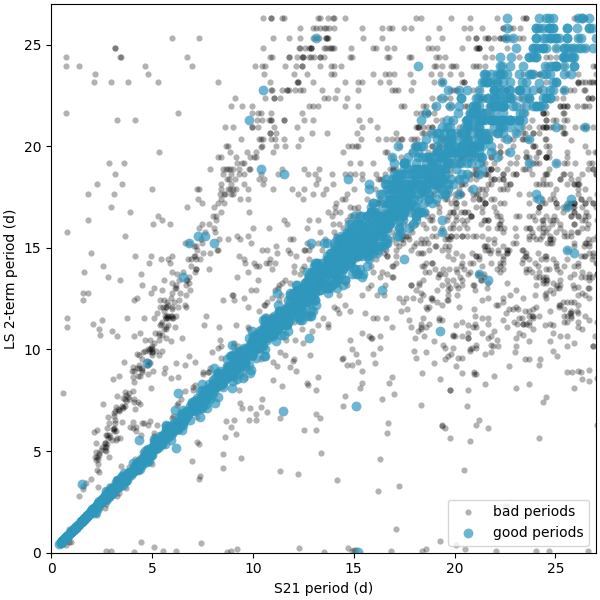

In [81]:
%matplotlib notebook

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(6,6))

ax.scatter(p_r_test[(predictions_g==0)&(p_r_test>0)], ls2_a_test[(predictions_g==0)&(p_r_test>0)], 
           c='#000', alpha=0.3, s=20, lw=0, label='bad periods')
ax.scatter(p_r_test[(predictions_g==1)&(p_r_test>0)], ls2_a_test[(predictions_g==1)&(p_r_test>0)], 
           c='#2f96bc', alpha=0.7, s=50, lw=0, label='good periods')
ax.set(xlim=(0, 27), ylim=(0,27), xlabel='S21 period (d)', ylabel='LS 2-term period (d)')
ax.legend(loc='lower right')

<IPython.core.display.Javascript object>


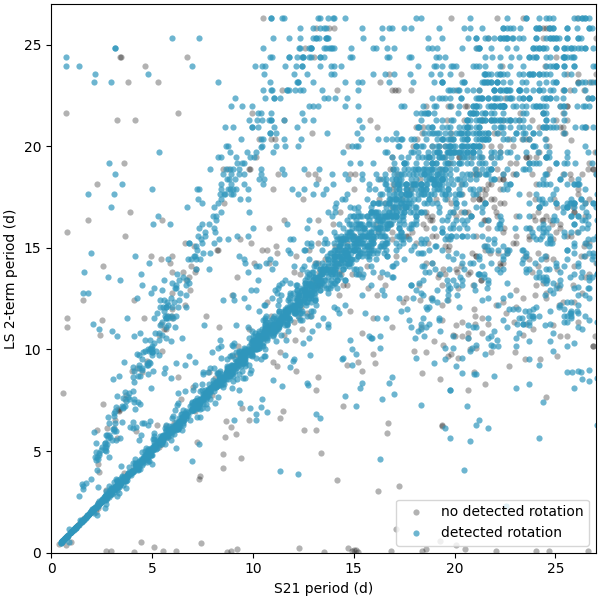

In [82]:
%matplotlib notebook

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(6,6))

ax.scatter(p_r_test[(predictions==0)&(p_r_test>0)], ls2_a_test[(predictions==0)&(p_r_test>0)], 
           c='k', alpha=0.3, s=20, lw=0, label='no detected rotation')
ax.scatter(p_r_test[(predictions==1)&(p_r_test>0)], ls2_a_test[(predictions==1)&(p_r_test>0)], 
           c='#2f96bc', alpha=0.7, s=20, lw=0, label='detected rotation')
ax.set(xlim=(0, 27), ylim=(0,27), xlabel='S21 period (d)', ylabel='LS 2-term period (d)')
ax.legend(loc='lower right')

<IPython.core.display.Javascript object>


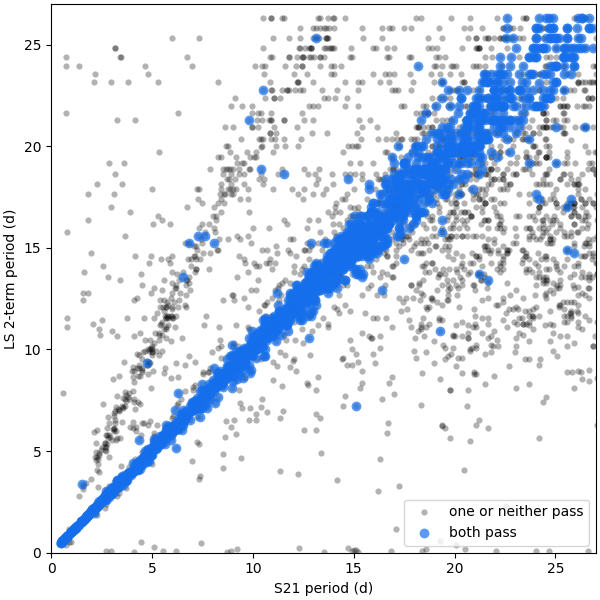

In [77]:
%matplotlib notebook

fig, ax = plt.subplots(1, constrained_layout=True, figsize=(6,6))

ax.scatter(p_r_test[p_r_test>0], ls2_a_test[p_r_test>0], c='k', alpha=0.3, s=20, lw=0, label='one or neither pass')
ax.scatter(p_r_test[(predictions==1)&(predictions_g==1)&(p_r_test>0)], 
           ls2_a_test[(predictions==1)&(predictions_g==1)&(p_r_test>0)], c='#156fed', alpha=0.7, s=50, lw=0, 
           label='both pass')
ax.set(xlim=(0,27), ylim=(0,27), xlabel='S21 period (d)', ylabel='LS 2-term period (d)')
ax.legend(loc='lower right')

In [48]:
len(p_r_test[(predictions==1)&(predictions_g==1)])/len(p_r_test)

0.13797355621018018

In [49]:
len(p_r_test[(predictions==1)&(predictions_g==1)&(p_r_test>0)])/len(p_r_test)

0.1252997191203672

In [50]:
0.1252997191203672 / 0.13797355621018018

0.9081429990069513